<a href="https://colab.research.google.com/github/Mish46/flight_prices/blob/main/Flight_Prices_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#Code to ignore warnings
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
import os
cwd = os.getcwd()
print(cwd)

import os
os.listdir()
train_data=pd.read_excel(r"/content/Data_Train.xlsx")

/content


In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#Checking for missing values using isnull()
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking for the sum of missing values using isnull().sum()
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
#Checking for the row with the missing data
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
#Dropping all the  missing values and inplace=True modifies the original dataframe
train_data.dropna(inplace=True)

In [ ]:
#Getting the accurate memory usage
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


In [ ]:
#Performing a shallow copy
data=train_data.copy()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#Create a function to change a datatype of "data and time " data into the relevevant format
def change_into_Datetime(col):
  data[col]=pd.to_datetime(data[col])

In [ ]:
#These are the columns where the data type should be changed
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
  change_into_Datetime(feature)


In [ ]:
#Checking whether the data type has been changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
#Now we will extract features from "date_of_journey"
data["Journey_day"]=data['Date_of_Journey'].dt.day
data["Journey_month"]=data['Date_of_Journey'].dt.month
data["Journey_year"]=data['Date_of_Journey'].dt.year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-07 05:50:00,2024-09-07 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-09-07 18:05:00,2024-09-07 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-09-07 16:50:00,2024-09-07 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
#Clean Dep_Time and Arrival_Time(Although it contains the date we will only be considering the times)
def extract_hour_min(df,col):
  df[col+"_hour"]=df[col].dt.hour
  df[col+"_minuite"]=df[col].dt.minute
  return df.head()

extract_hour_min(data,"Arrival_Time")
extract_hour_min(data,"Dep_Time")




,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minuite,Dep_Time_hour,Dep_Time_minuite
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-07 05:50:00,2024-09-07 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-09-07 18:05:00,2024-09-07 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-09-07 16:50:00,2024-09-07 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [ ]:
#Removing arrival and depature time
data.drop(['Arrival_Time', 'Dep_Time'], axis=1, inplace=True)


In [ ]:
#Starting Data Analysis From Here Onwards
data.columns.tolist()


['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minuite',
 'Dep_Time_hour',
 'Dep_Time_minuite']

In [ ]:
def flight_dep_time(x):
  if (x>4) and (x<8):
    return "Early Morning"
  elif (x>8) and (x<=12):
    return "Morning"
  elif (x>16) and (x<=20):
    return "Evening"
  elif (x>20) and (x<=24):
    return "Night"
  else:
    return "late night"

<Axes: xlabel='Dep_Time_hour'>

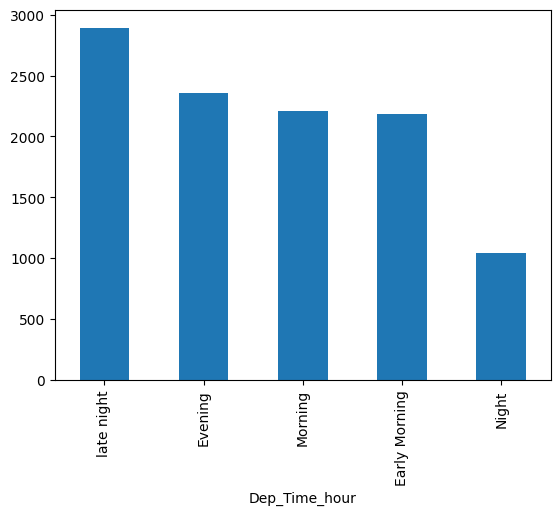

In [ ]:
#Applying the function and finding the timings of the flight
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar")


In [ ]:
!pip install plotly
!pip install chart_studio

In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
def preprocess_duration(x):
  if 'h' not in x:
    x='0h'+' '+x
  elif 'm'not in x:
    x=x+' '+'0m'

  return x

In [ ]:
data['Duration']=data['Duration'].apply(preprocess_duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minuite,Dep_Time_hour,Dep_Time_minuite
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [ ]:
 data['Duration_hour']=data['Duration'].apply(lambda x: x.split(' ')[0][0:-1])
 data['Duration_min']=data['Duration'].apply(lambda x: x.split(' ')[1][0:-1])


In [ ]:
data['Duration_In_M']=data['Duration_hour'].astype(int)*60+data['Duration_min'].astype(int)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minuite,Dep_Time_hour,Dep_Time_minuite,Duration_hour,Duration_min,Duration_In_M
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minuite', 'Dep_Time_hour', 'Dep_Time_minuite',
       'Duration_hour', 'Duration_min', 'Duration_In_M'],
      dtype='object')

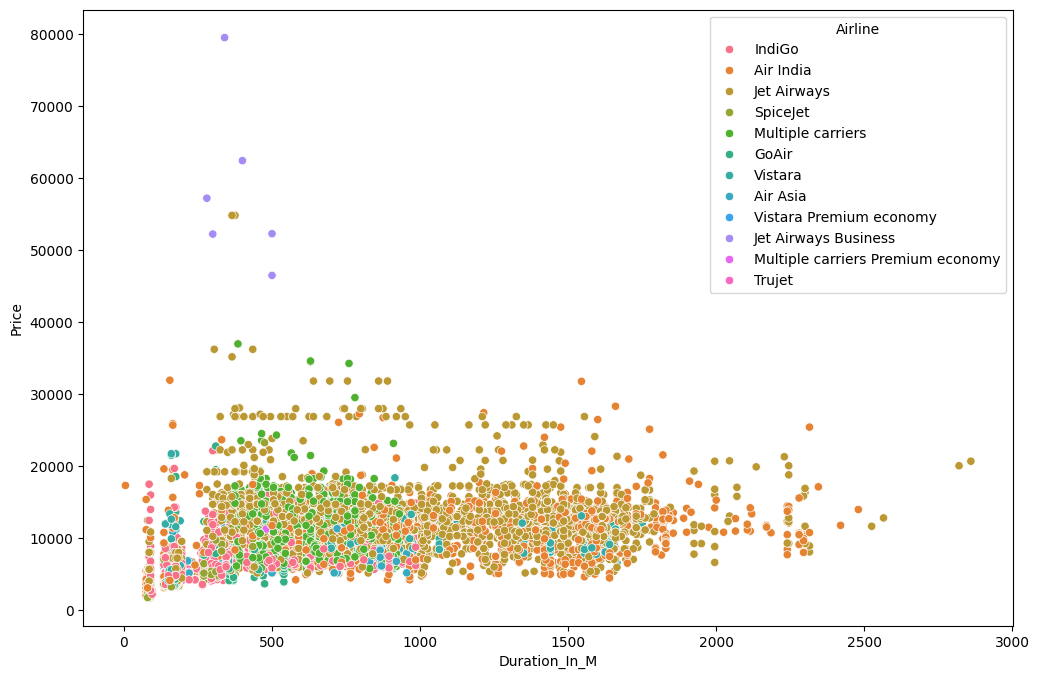

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration_In_M', y='Price',hue='Airline',data=data)
plt.show()

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


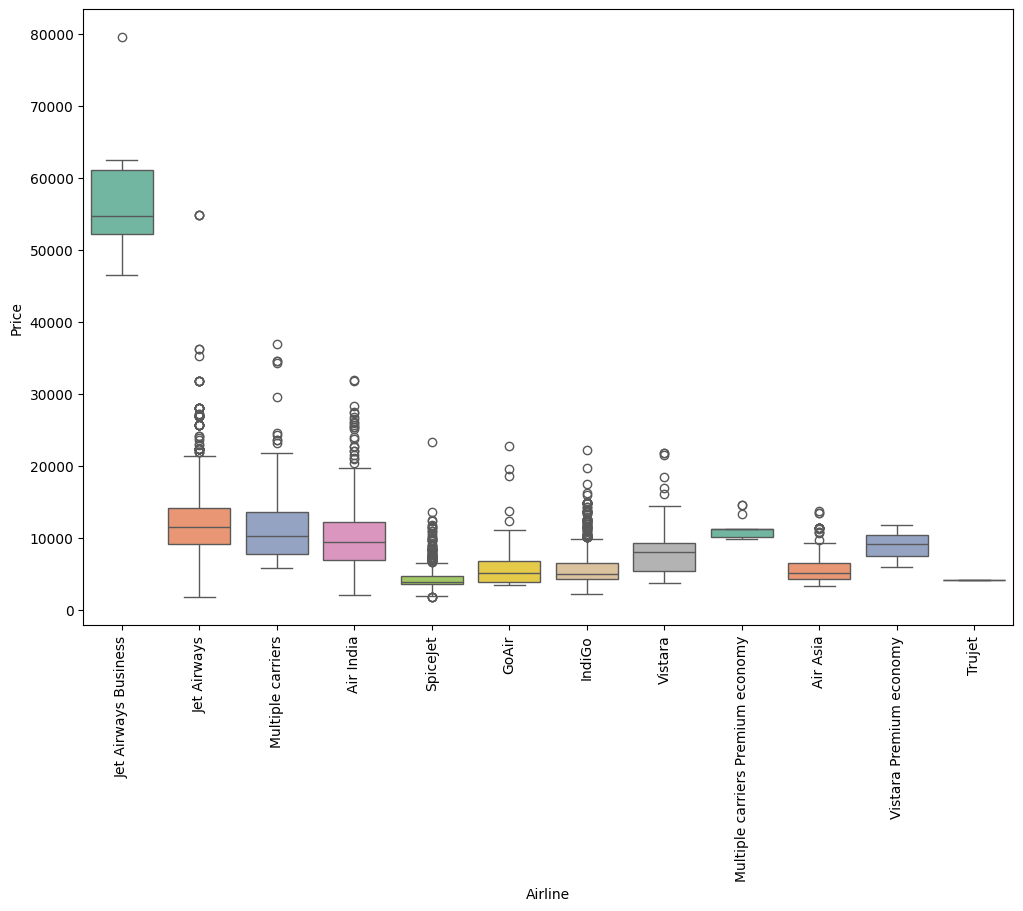

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False),palette='Set2')
plt.xticks(rotation='vertical')#Rotate the x axis labels
plt.show()

In [ ]:
#Applying One Hot Encoding For The Data Based On The Destination
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minuite,Dep_Time_hour,Dep_Time_minuite,Duration_hour,Duration_min,Duration_In_M
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [ ]:
[col for col in data.columns if data[col].dtype=="object"]

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Duration_hour',
 'Duration_min']

In [ ]:
[col for col in data.columns if data[col].dtype!="object"]

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minuite',
 'Dep_Time_hour',
 'Dep_Time_minuite',
 'Duration_In_M']

In [ ]:
data["Source"].unique()#Removes the duplicates

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
for sub_category in data['Source'].unique():
  data["Source_"+sub_category]=data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [ ]:
data.groupby(['Airline'])['Price'].mean().sort_values()


,Price
Airline,
Trujet,4140.000000
SpiceJet,4338.284841
Air Asia,5590.260188
IndiGo,5673.682903
GoAir,5861.056701
Vistara,7796.348643
Vistara Premium economy,8962.333333
Air India,9612.427756
Multiple carriers,10902.678094


In [ ]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index


In [ ]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
#Now based on the previous output we will map the ailines column based on the it
data['Airline']=data['Airline'].map(dict_airlines)
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [ ]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index


In [ ]:
dest
dict_dest={key:index for index,key in enumerate(dest,0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination']=data['Destination'].map(dict_dest)

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minuite,Duration_hour,Duration_min,Duration_In_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,16,50,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,2019-04-09,Kolkata,3,CCU → BLR,2h 30m,non-stop,No info,4107,9,...,19,55,2,30,150,0,1,0,0,0
10679,7,2019-04-27,Kolkata,3,CCU → BLR,2h 35m,non-stop,No info,4145,27,...,20,45,2,35,155,0,1,0,0,0
10680,10,2019-04-27,Banglore,2,BLR → DEL,3h 0m,non-stop,No info,7229,27,...,8,20,3,0,180,1,0,0,0,0
10681,5,2019-03-01,Banglore,2,BLR → DEL,2h 40m,non-stop,No info,12648,1,...,11,30,2,40,160,1,0,0,0,0


In [ ]:
data['Total_Stops'].unique()#sINCE THIS IS ORDINAL DATA WE WILL USE LABEL ENCODING OF SCIKIT LEARN

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}


In [ ]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [ ]:
data['Additional_Info'].value_counts()/len(data)*100

,count
Additional_Info,
No info,78.112713
In-flight meal not included,18.554578
No check-in baggage included,2.995694
1 Long layover,0.177869
Change airports,0.065531
Business class,0.037446
No Info,0.028085
1 Short layover,0.009362
Red-eye flight,0.009362


In [ ]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minuite,Duration_hour,Duration_min,Duration_In_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,...,16,50,4,45,285,1,0,0,0,0


In [ ]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minuite', 'Dep_Time_hour', 'Dep_Time_minuite',
       'Duration_hour', 'Duration_min', 'Duration_In_M', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')


In [ ]:
#Now we will drop the unnecessary data
data.drop(columns=['Date_of_Journey', 'Additional_Info', 'Source', 'Journey_day', 'Route', 'Duration'], axis=1, inplace=True,errors='ignore')


In [ ]:
print(data.columns)


Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minuite',
       'Dep_Time_hour', 'Dep_Time_minuite', 'Duration_hour', 'Duration_min',
       'Duration_In_M', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')


In [ ]:
len(data.columns)

18

In [ ]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minuite,Dep_Time_hour,Dep_Time_minuite,Duration_hour,Duration_min,Duration_In_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,3,2019,1,10,22,20,2,50,170,1,0,0,0,0
1,7,3,2,7662,5,2019,13,15,5,50,7,25,445,0,1,0,0,0
2,10,4,2,13882,6,2019,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,5,2019,23,30,18,5,5,25,325,0,1,0,0,0
4,3,2,1,13302,3,2019,21,35,16,50,4,45,285,1,0,0,0,0


In [ ]:
#Outlier detection starts here,we will plot three types of plots
def plot(df,col):
  fig , (ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.violinplot(df[col],ax=ax3)
  plt.show()

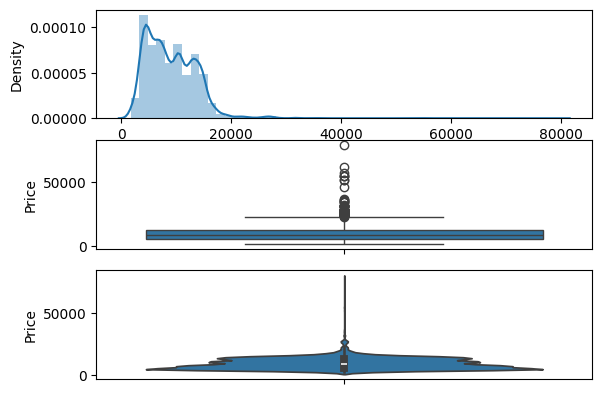

In [ ]:
plot(data,'Price')

In [ ]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1#Where 50 percent of the data lies
max=q3+1.5*iqr
min=q1-1.5*iqr
print(max)
print(min)


23017.0
-5367.0


In [ ]:
print([price for price in data['Price'] if price>max or price<min])


[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
data['Price']=np.where(data['Price']>max,data['Price'].median(),data['Price'])
data['Price']=np.where(data['Price']<min,data['Price'].median(),data['Price'])

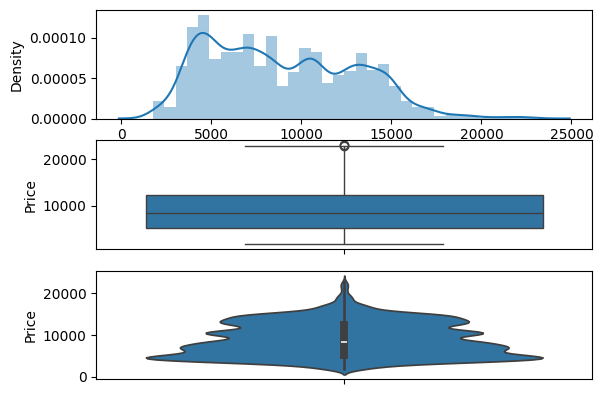

In [ ]:
plot(data,'Price')

In [ ]:
data['Airline'].unique()

array([ 3,  7, 10,  1,  8,  4,  5,  2,  6, 11,  9,  0])

In [ ]:
X=data.drop(['Price'],axis=1)
y=data['Price']


In [ ]:
data['Airline'].unique()

array([ 3,  7, 10,  1,  8,  4,  5,  2,  6, 11,  9,  0])

In [ ]:
from sklearn.feature_selection import mutual_info_regression #To check the dependency between the target(dependent) and independent feature


In [ ]:
imp= mutual_info_regression(X,y)
imp

array([1.31287932, 1.05392724, 0.78934515, 0.61936849, 0.00517679,
       1.13481776, 0.89958177, 0.92126585, 0.75497177, 1.12084346,
       0.66671066, 1.77537541, 0.37606651, 0.45344791, 0.51527239,
       0.12971437, 0.19139947])

In [ ]:
imp_df=pd.DataFrame(imp,index=X.columns)

In [ ]:
imp_df

,0
Airline,1.312879
Destination,1.053927
Total_Stops,0.789345
Journey_month,0.619368
Journey_year,0.005177
Arrival_Time_hour,1.134818
Arrival_Time_minuite,0.899582
Dep_Time_hour,0.921266
Dep_Time_minuite,0.754972
Duration_hour,1.120843


In [ ]:
imp_df.columns=['Importance']
imp_df

,Importance
Airline,1.312879
Destination,1.053927
Total_Stops,0.789345
Journey_month,0.619368
Journey_year,0.005177
Arrival_Time_hour,1.134818
Arrival_Time_minuite,0.899582
Dep_Time_hour,0.921266
Dep_Time_minuite,0.754972
Duration_hour,1.120843


In [ ]:
imp_df.sort_values(by='Importance',ascending=True)

,Importance
Journey_year,0.005177
Source_Chennai,0.129714
Source_Mumbai,0.191399
Source_Banglore,0.376067
Source_Kolkata,0.453448
Source_Delhi,0.515272
Journey_month,0.619368
Duration_min,0.666711
Dep_Time_minuite,0.754972
Total_Stops,0.789345


In [ ]:
#We will now start bulding the model from here
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)
ml_model=RandomForestRegressor()
ml_model.fit(X_train,y_train)
y_pred=ml_model.predict(X_test)

In [ ]:
y_pred

array([12358.9925    , 11237.84883333,  7749.00081962, ...,
        7490.83867857,  7777.53766667, 11285.76202198])

In [ ]:
metrics.r2_score(y_test,y_pred)*100

66.30424468530136

In [ ]:
import pickle
file=open('flight_rf.pkl','wb')
pickle.dump(ml_model,file)


In [ ]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)
y_pred2=forest.predict(X_test)
metrics.r2_score(y_test,y_pred2)

0.6630424468530136

In [ ]:
#We will now automate the function and we will do this by passing the model into a function
def mape(y_test,y_pred):
  y_test,y_pred=np.array(y_test),np.array(y_pred)
  return np.mean(np.abs((y_test-y_pred)/y_test))*100

In [ ]:
mape(y_test,y_pred)

16.461875475701962

In [ ]:
def predict(ml_model):
  model=ml_model.fit(X_train,y_train)
  print('Training Score:{}'.format(model.score(X_train,y_train)))
  y_pred=model.predict(X_test)
  print('Predictions are {}'.format(y_pred))
  print('\n')

  r2_score=metrics.r2_score(y_test,y_pred)
  print('r2_score is {}'.format(r2_score))
  print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_pred)))
  print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_pred)))
  print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
  print('MAPE: {}'.format(mape(y_test,y_pred)))
  sns.distplot(y_test-y_pred)

  return model



Training Score:0.8429199398024991
Predictions are [12403.8975     11185.467       7934.03841436 ...  7312.63727273
  7591.09905556 11292.17788889]


r2_score is 0.663767179022608
MAE: 1471.4973616167513
MSE: 5488247.884998935
RMSE: 2342.7009807055906
MAPE: 16.448006832356178


RandomForestRegressor()

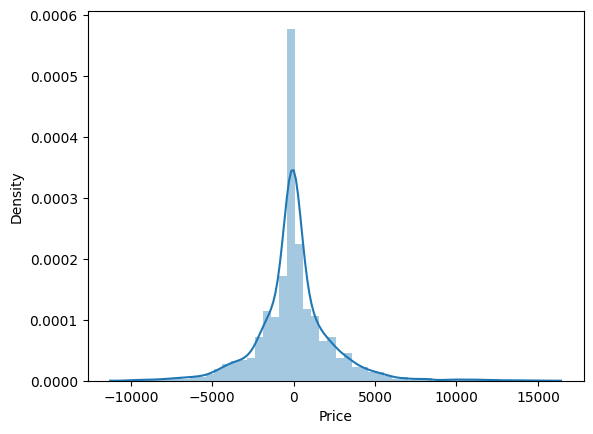

In [582]:
predict(RandomForestRegressor())